In [ ]:
#Chinmay Bake Machine Learning Assignment 4 

In [59]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator
spark=SparkSession.builder.appName('K_Means_Clustering').getOrCreate()
main_df=spark.read.csv(r'C:\Users\chinm\Downloads\UberApril14.csv',inferSchema=True,header=True)

In [61]:
main_df.show(10,False)

+----------------+-------+--------+------+
|Date/Time       |Lat    |Lon     |Base  |
+----------------+-------+--------+------+
|4/1/2014 0:11:00|40.769 |-73.9549|B02512|
|4/1/2014 0:17:00|40.7267|-74.0345|B02512|
|4/1/2014 0:21:00|40.7316|-73.9873|B02512|
|4/1/2014 0:28:00|40.7588|-73.9776|B02512|
|4/1/2014 0:33:00|40.7594|-73.9722|B02512|
|4/1/2014 0:33:00|40.7383|-74.0403|B02512|
|4/1/2014 0:39:00|40.7223|-73.9887|B02512|
|4/1/2014 0:45:00|40.762 |-73.979 |B02512|
|4/1/2014 0:55:00|40.7524|-73.996 |B02512|
|4/1/2014 1:01:00|40.7575|-73.9846|B02512|
+----------------+-------+--------+------+
only showing top 10 rows



In [62]:
#Q1 What is the shape of the data contained in the UberApril14.CSV?

print((main_df.count(), len(main_df.columns)))

(564516, 4)


In [63]:
#Q2 How many Uber trips were recorded for each company (by base code). 

main_df.groupBy('Base').count().orderBy('count').show(10,False)

+------+------+
|Base  |count |
+------+------+
|B02764|9908  |
|B02512|35536 |
|B02617|108001|
|B02598|183263|
|B02682|227808|
+------+------+



In [64]:
#Q2 What can you say about the distribution trips among companies? Are there companies that dominate in terms of the percentage share of the trips? 

'''As we could observe in the above code, the trip count is substantially dominated by base:B02682 and base:B02598.
So that we could essentially conclude that majority of the data points (more than 50%) are concentrated and distributed 
amongst the bases mentioned previously. Base:B02764 has a concentration of less than 2% of data points.'''

'As we could observe in the above code, the trip count is substantially dominated by base:B02682 and base:B02598.\nSo that we could essentially conclude that majority of the data points (more than 50%) are concentrated and distributed \namongst the bases mentioned previously. Base:B02764 has a concentration of less than 2% of data points.'

In [67]:
# Q3 What features (or attributes) are recorded for each Uber trip? 

main_df.columns

['Date/Time', 'Lat', 'Lon', 'Base']

In [68]:
#Q3 Does any attribute require transformation because of data type requirements in Clustering? If so, identify the feature and comment on the type of transformation required. Include these comments in your notebook

'''Although the Date/Time variable might require a transformation in order for us to vectorize it and put it across 
as an input column; but the variable itself is not very significant with respect to our probelm statement. We have been 
asked to formulate clusters based on the pick up location and its corresponding base company. In this context, the date/time
variable is not exactly required for the formation of clusters.'''

'Although the Date/Time variable might require a transformation in order for us to vectorize it and put it across \nas an input column; but the variable itself is not very significant with respect to our probelm statement. We have been \nasked to formulate clusters based on the pick up location and its corresponding base company. In this context, the date/time\nvariable is not exactly required for the formation of clusters.'

In [69]:
#Q4 Perform the transformations, if any, identified in step # 3. Perform feature engineering if and where needed, including vectorization of relevant variables. Provide a printout of the schema of your feature-engineered data.

IP_df=main_df.select('Lat','Lon','Base')
input_cols=['Lat','Lon']
vec_assembler = VectorAssembler(inputCols = input_cols, outputCol="features")
transformed_df = vec_assembler.transform(IP_df)

In [70]:
#Q4 Provide a printout of the schema of your feature-engineered data.

transformed_df.printSchema()

root
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)
 |-- features: vector (nullable = true)



In [71]:
#Q5 To train and then test your model, split the data from UberApril14 into training and test datasets using a 75/25 split

training_df,testing_df=transformed_df.randomSplit([0.75,0.25])

In [72]:
#Shape of the Training data 

print((training_df.count(), len(training_df.columns)))

(423558, 4)


In [73]:
#Distribution count of the Training data amongst the base companies

training_df.groupBy('Base').count().orderBy('count').show(10,False)

+------+------+
|Base  |count |
+------+------+
|B02764|7399  |
|B02512|26491 |
|B02617|81121 |
|B02598|137647|
|B02682|170900|
+------+------+



In [74]:
#Shape of the testing data 

print((testing_df.count(), len(testing_df.columns)))

(140958, 4)


In [75]:
#Distribution count of the testing data amongst the base companies

testing_df.groupBy('Base').count().orderBy('count').show(10,False)

+------+-----+
|Base  |count|
+------+-----+
|B02764|2509 |
|B02512|9045 |
|B02617|26880|
|B02598|45616|
|B02682|56908|
+------+-----+



In [76]:
#Q5 Like you did in step 2 above, comment on the percentage distribution of trips among companies in both the training and test datasets. Are they representative of the overall data? Include your answer as comments in the notebook

'''Like we had observed in the main dataset base:B02682 had a concentration of approximately 40% of the data points. 
In the training dataset have roughly similar proportion of data points for this base (40.33% to be precise.). 
Likewise, in the testing dataset the same base has a percentage distribution of 40.40%. For the base company with least 
share of data points the percentage distribution for main, training and testing dataset is 1.7%, 1.744% and
1.786% respectively. This generically implies that both training and testing datasets very well represent the main dataset. '''

'Like we had observed in the main dataset base:B02682 had a concentration of approximately 40% of the data points. \nIn the training dataset have roughly similar proportion of data points for this base (40.33% to be precise.). \nLikewise, in the testing dataset the same base has a percentage distribution of 40.40%. For the base company with least \nshare of data points the percentage distribution for main, training and testing dataset is 1.7%, 1.744% and\n1.786% respectively. This generically implies that both training and testing datasets very well represent the main dataset. '

With K =2
The SSE:1012.5962994183361
------------------------------------------------------------
With K =3
The SSE:762.0300800234515
------------------------------------------------------------
With K =4
The SSE:623.998740889746
------------------------------------------------------------
With K =5
The SSE:515.7296176119202
------------------------------------------------------------
With K =6
The SSE:362.8466169140738
------------------------------------------------------------
With K =7
The SSE:303.46222014221064
------------------------------------------------------------
With K =8
The SSE:267.39217122456904
------------------------------------------------------------
With K =9
The SSE:246.61537284918643
------------------------------------------------------------


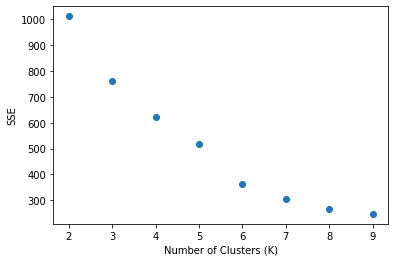

In [77]:
#Q6 Build and train KMeans Clustering model. For this you, will use the Elbow method to identify the number 
#   of clusters to start the algorithm. Use a seed value to ensure each iteration starts with the same initial 
#   set of conditions

from pyspark.ml.clustering import KMeans
errors=[]
for k in range(2,10): 
    kmeans = KMeans(featuresCol='features',k=k).setSeed(2)
    model = kmeans.fit(training_df)
    intra_distance = model.computeCost(training_df)
    errors.append(intra_distance)
    print("With K ={}".format(k))
    print("The SSE:" + str(intra_distance))
    print('---'*20)
    
cluster_number = range(2,10)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.scatter(cluster_number,errors)
plt.show()

In [78]:
#Q6 Experiment with (n-1) and (n+1) number of clusters, where n is the optimal number found by the Elbow method. For each run, generate the SSE and Silhouette Coefficient. Select the best model on the basis of SSE and Silhouette Coefficient. 

for k in range(7,10): 
    kmeans = KMeans(featuresCol='features',k=k)
    model = kmeans.fit(training_df)
    intra_distance = model.computeCost(training_df)
    predictions=model.transform(training_df)
    evaluatorObj = ClusteringEvaluator()
    silhouette_coeff = evaluatorObj.evaluate(predictions)
    print("With K ={}".format(k))
    print("The SSE:" + str(intra_distance))
    print('Silhouette Coefficient: ' + str(silhouette_coeff))
    print('---'*20)

'''From the elbow method analysis, we assume N to be equal to '8'. Now, we will run the KMeans algorithm for (N+1)
and (N-1) iterations in order to obtain an optimal value along with computing the Silhoutte coefficient.  '''

With K =7
The SSE:303.4638750196525
Silhouette Coefficient: 0.6308768112256722
------------------------------------------------------------
With K =8
The SSE:278.00546344639156
Silhouette Coefficient: 0.6468558604301607
------------------------------------------------------------
With K =9
The SSE:264.14606539426495
Silhouette Coefficient: 0.5105931649679127
------------------------------------------------------------


"From the elbow method analysis, we assume N to be equal to '8'. Now, we will run the KMeans algorithm for (N+1)\nand (N-1) iterations in order to obtain an optimal value along with computing the Silhoutte coefficient.  "

In [79]:
#Q7 Using the best trained model from step 6, test the performance of the model against the test dataset. 
# Again, measure the performance by computing the SSE and Silhouette Coefficient. 

kmeans = KMeans(featuresCol='features',k=8)
model = kmeans.fit(testing_df)
predictions=model.transform(testing_df)
intra_distance = model.computeCost(testing_df)
predictions=model.transform(training_df)
evaluatorObj = ClusteringEvaluator()
silhouette_coeff = evaluatorObj.evaluate(predictions)
print("The SSE:" + str(intra_distance))
print('Silhouette Coefficient: ' + str(silhouette_coeff))

'''We proceeed with K=8 as it has the an optimal value of SSE and Silhoutte Coefficient amongst the above three selections.
Although K=9 has a lesser SSE, the Silhoutte Coefficient value also reduces. '''


The SSE:97.85591604506291
Silhouette Coefficient: 0.6313741704456756


'We proceeed with K=8 as it has the an optimal value of SSE and Silhoutte Coefficient amongst the above three selections.\nAlthough K=9 has a lesser SSE, the Silhoutte Coefficient value also reduces. '

In [80]:
# Q7 Comment of the accuracy of the clustering model on the basis these metrics as well as by comparing the 
#    distribution of trips among companies in the original dataset. 

predictions.groupBy('Base','prediction').count().orderBy('count',ascending=False).show(10,False)

'''With Silhoutte coefficient 0f 0.63 and SSE 0f 97.85, the model performs fairly good with testing data'''


+------+----------+-----+
|Base  |prediction|count|
+------+----------+-----+
|B02682|4         |75033|
|B02682|2         |65934|
|B02598|4         |60109|
|B02598|2         |52839|
|B02617|4         |36241|
|B02617|2         |29444|
|B02682|6         |17912|
|B02598|6         |15457|
|B02512|2         |11717|
|B02512|4         |11313|
+------+----------+-----+
only showing top 10 rows



'With Silhoutte coefficient 0f 0.63 and SSE 0f 97.85, the model performs fairly good with testing data'

In [82]:
# Q7 Comment of the accuracy of the clustering model on the basis these metrics as well as by comparing the 
#    distribution of trips among companies in the original dataset.

predictions.filter(predictions['Base']=='B02682').select('prediction').show()

'''Likewise, if we select a specifc base and evaluate what cluster is the value of that base associated with, 
then it turns out that for the above base selected, most values are associated with cluster 3. This indiccates 
that the model is quite accurate. '''

+----------+
|prediction|
+----------+
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         6|
|         6|
|         6|
+----------+
only showing top 20 rows



'Likewise, if we select a specifc base and evaluate what cluster is the value of that base associated with, \nthen it turns out that for the above base selected, most values are associated with cluster 3. This indiccates \nthat the model is quite accurate. '

In [83]:
# Q8 Do your own research on evaluation metrics, other than the Silhouette Coefficient, that may be used to measure the performance of the KMeans Clustering algorithm as implemented by pyspark’s MLlib in python. You may want to see how your final model performs on these other metrics. 

'''We could compute the cluster centroids for the clusters which our model has already assigned. These centroids
could be visualised using a 3D plot in order to determine if any data points are close to any other cluster when compared
with the current cluster assignment. On this basis, we could contextually analyse and rate our model.'''

print("Cluster Centers: ")
ctr=[]
centers = model.clusterCenters()
for center in centers:
    ctr.append(center)
    print(center)

Cluster Centers: 
[ 40.78663133 -73.87970203]
[ 40.65663367 -73.77991524]
[ 40.76534843 -73.97322601]
[ 40.70109712 -74.19856212]
[ 40.73104509 -73.99863783]
[ 41.07545185 -73.11281111]
[ 40.68871988 -73.96555459]
[ 40.97641647 -73.66670784]
